In [3]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [1]:
%store -r G_1of3
%store -r G_2of3
%store -r G_overlap_W7_W8_White

In [13]:
def getXYZDist(G):
    xyzDist = [[],[],[]]
    for e in G.edges(data=True):
      xyzDist[0].append(abs(G.nodes[e[0]]['x'] - G.nodes[e[1]]['x']))
      xyzDist[1].append(abs(G.nodes[e[0]]['y'] - G.nodes[e[1]]['y']))
      xyzDist[2].append(abs(G.nodes[e[0]]['z'] - G.nodes[e[1]]['z']))
    return xyzDist

In [14]:
xDist = [[],[],[]]
yDist = [[],[],[]]
zDist = [[],[],[]]

xDist[0], yDist[0], zDist[0] = getXYZDist(G_1of3)
xDist[1], yDist[1], zDist[1] = getXYZDist(G_2of3)
xDist[2], yDist[2], zDist[2] = getXYZDist(G_overlap_W7_W8_White)

In [15]:
def distanceBars(dists):

  distance_sequence = sorted((round(d) for d in dists), reverse=True)

  bars = np.unique(distance_sequence, return_counts=True)
  return bars


In [60]:
def plotXYZDist(dists):
  fig,axes = plt.subplots(3,3, figsize=(8,9))
  fig.suptitle(f'Edge Distance Distribution', fontsize=16)
  dir = ['x','y','z']

  for i in range(3):
    distBars = np.array([distanceBars(dists[i][0]), distanceBars(dists[i][1]), distanceBars(dists[i][2])])
    maxX = max(np.amax(distBars[0][0]), np.amax(distBars[1][0]), np.amax(distBars[2][0]))
    maxY = max(np.amax(distBars[0][1]), np.amax(distBars[1][1]), np.amax(distBars[2][1]))

    axes[0,i].bar(*distanceBars(dists[i][0]))
    axes[0,i].set_title(f'Unique ({dir[i]})')
    axes[0,i].set_xlim(0,maxX)
    axes[0,i].set_ylim(0,maxY)

    axes[1,i].bar(*distanceBars(dists[i][1]))
    axes[1,i].set_title(f'Overlap (2/3) ({dir[i]})')
    axes[1,i].set_xlim(0,maxX)
    axes[1,i].set_ylim(0,maxY)

    axes[2,i].bar(*distanceBars(dists[i][2]))
    axes[2,i].set_title(f'Overlap (All) ({dir[i]})')
    axes[2,i].set_xlim(0,maxX)
    axes[2,i].set_ylim(0,maxY)

  plt.savefig('data/images/overlaps/123/xyzDistDistribution.png', dpi=300)

/var/folders/vh/l4nps4_j2ll9r7_193lm1fn80000gn/T/ipykernel_22058/4220314666.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  distBars = np.array([distanceBars(dists[i][0]), distanceBars(dists[i][1]), distanceBars(dists[i][2])])


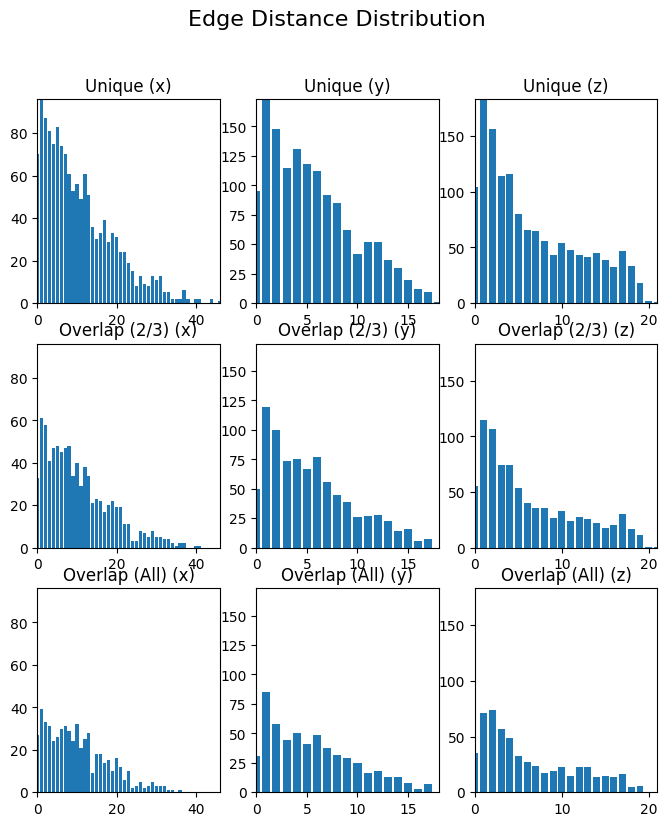

In [61]:
plotXYZDist([xDist, yDist, zDist])